In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names=['t-shirt/top','trousure','pullover','dress','coat',
             'sandal','shirt','sneaker','bag','ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

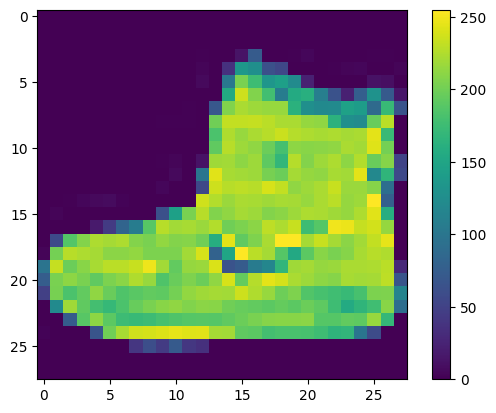

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images=train_images/255.0
test_images=test_images/255.0

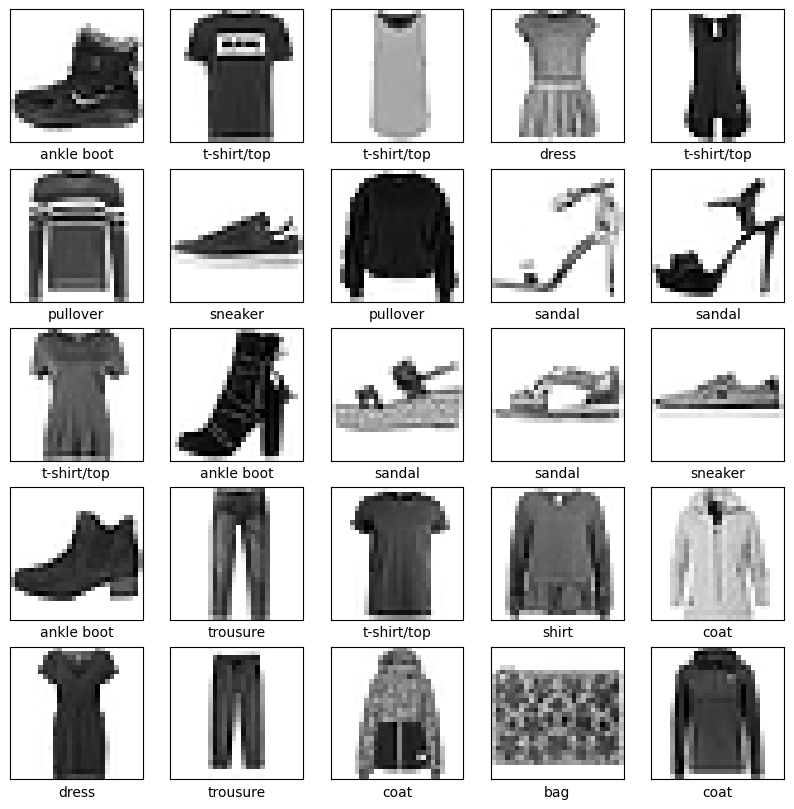

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])


In [15]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5023 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3734 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3374 - accuracy: 0.8754
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3106 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2941 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2798 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2681 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2576 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2469 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.23

In [16]:
test_loss, test_acc=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 1s - loss: 0.3608 - accuracy: 0.8729 - 647ms/epoch - 2ms/step


In [17]:
print(test_acc)

0.8729000091552734


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
pred=model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [20]:
pred=np.argmax(pred,axis=-1)

In [21]:
pred

array([9, 2, 1, ..., 8, 1, 5])

In [22]:
print(classification_report(test_labels,pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.82      0.78      1000
           3       0.85      0.92      0.88      1000
           4       0.88      0.60      0.72      1000
           5       0.97      0.97      0.97      1000
           6       0.62      0.76      0.69      1000
           7       0.93      0.96      0.95      1000
           8       0.99      0.96      0.97      1000
           9       0.97      0.94      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [23]:
print(confusion_matrix(test_labels,pred))

[[812   2   8  26   1   1 146   0   4   0]
 [  3 973   0  17   2   0   4   0   1   0]
 [ 13   0 821  16  30   0 119   0   1   0]
 [ 16   2   3 924  15   0  37   0   3   0]
 [  0   1 202  60 602   0 135   0   0   0]
 [  0   0   0   1   0 966   0  19   1  13]
 [ 95   0  67  41  29   0 764   0   4   0]
 [  0   0   0   0   0  21   0 964   0  15]
 [  3   0   2   7   3   1  21   3 960   0]
 [  0   0   0   0   0  10   1  46   0 943]]
